<a href="https://colab.research.google.com/github/ToonToonToon/229352-Statical-Learning-For-DataScience-2/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

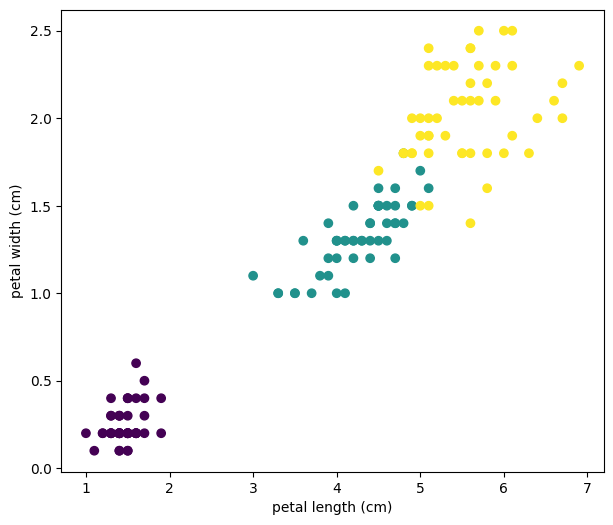

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

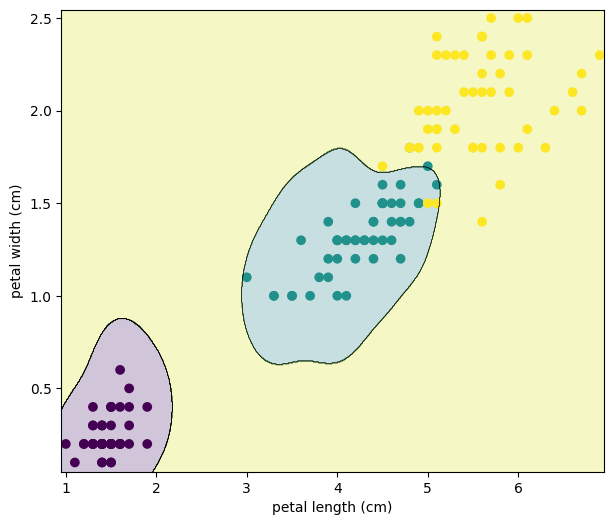

In [7]:
svm = SVC(kernel = 'rbf', gamma = 10)
svm.fit(X_train , y_train)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Decision Boundary for C = 0.01


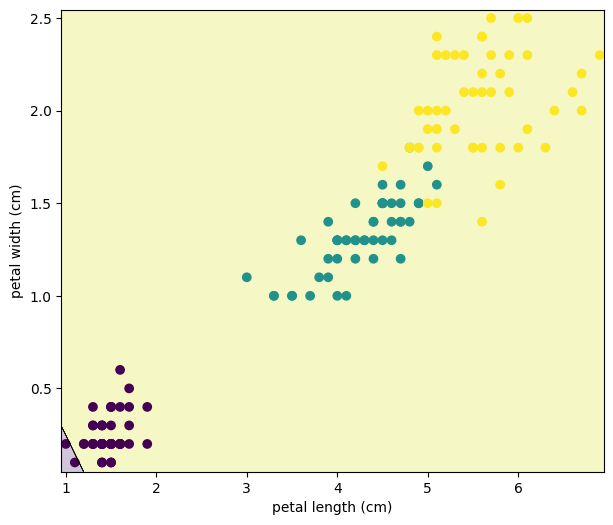

Decision Boundary for C = 0.1


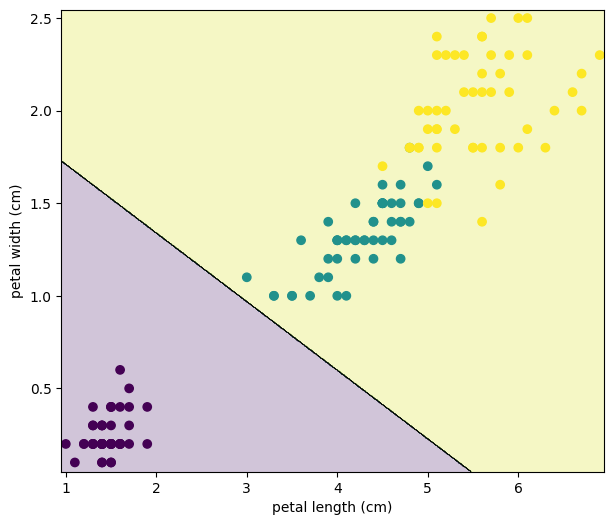

Decision Boundary for C = 1.0


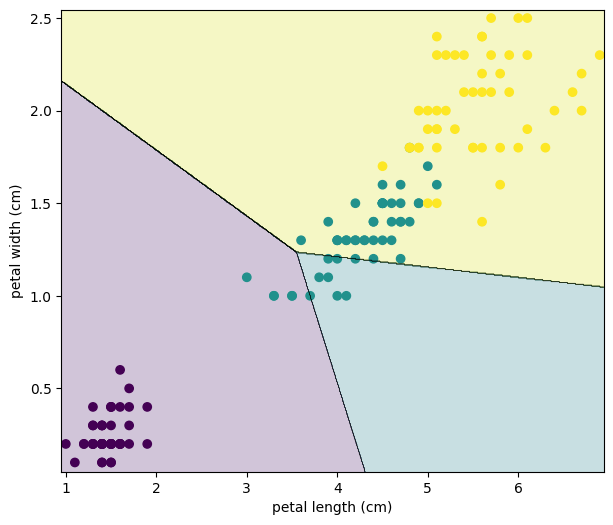

Decision Boundary for C = 10.0


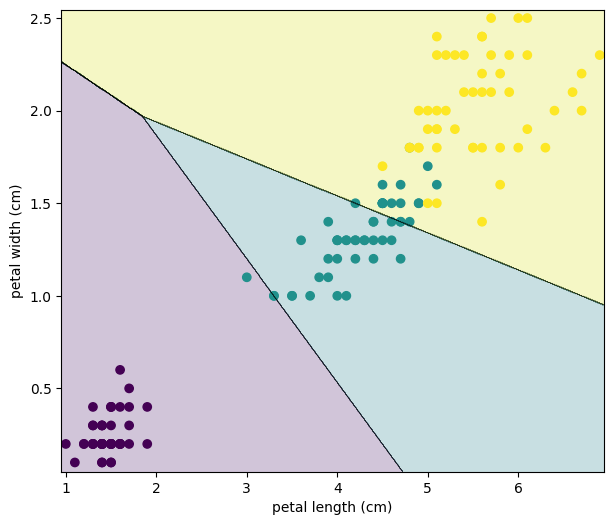

Decision Boundary for C = 100.0


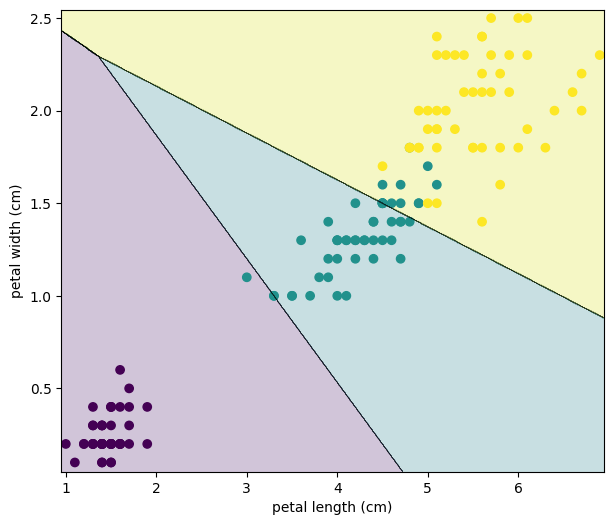

In [8]:
#TODO
for c_val in [0.01, 0.1, 1.0, 10.0, 100.0]:
    linearsvm = LinearSVC(loss='hinge', C=c_val, max_iter=100000)
    linearsvm.fit(X_train, y_train)
    print(f"Decision Boundary for C = {c_val}")
    plot_decision_boundary(linearsvm, X, y)
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [9]:
#TODO
best_c = 1.0
linearsvm = LinearSVC(loss='hinge', C=best_c, max_iter=100000)
linearsvm.fit(X_train, y_train)
test_error = 1 - linearsvm.score(X_test, y_test)
print(f"Test Error for C={best_c}: {test_error:.4f}")

Test Error for C=1.0: 0.3556


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Decision Boundary for Gamma = 0.01


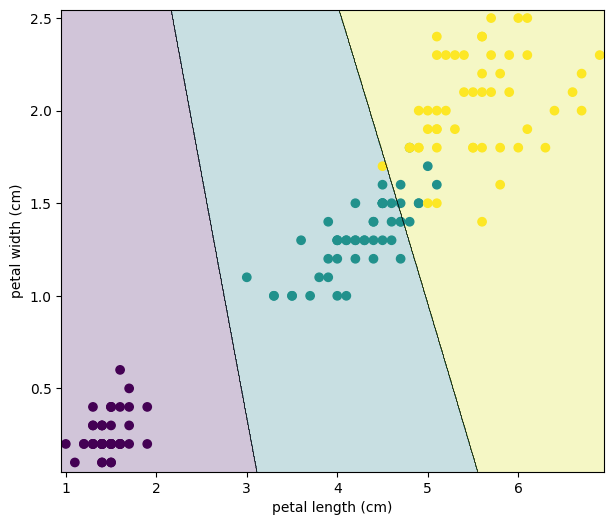

Decision Boundary for Gamma = 0.1


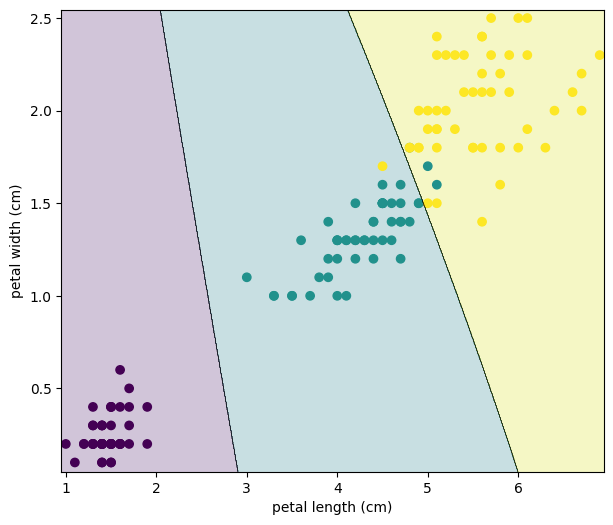

Decision Boundary for Gamma = 1.0


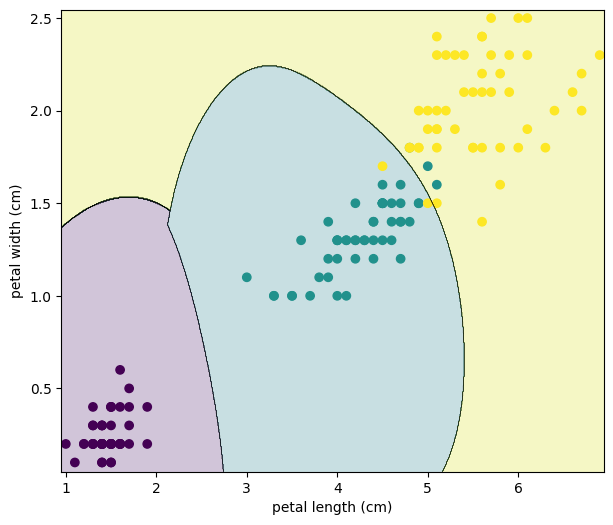

Decision Boundary for Gamma = 10.0


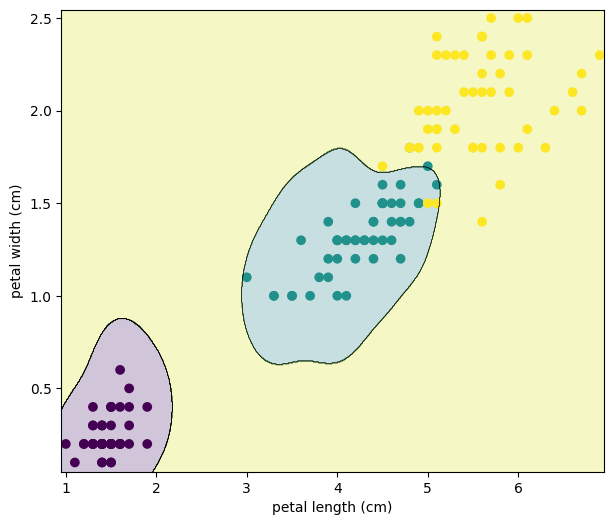

Decision Boundary for Gamma = 100.0


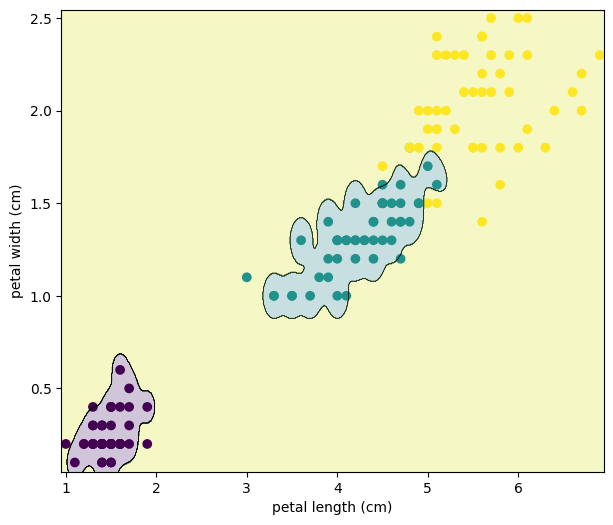

In [10]:
#TODO
for g_val in [0.01, 0.1, 1.0, 10.0, 100.0]:
    kernelsvm = SVC(kernel='rbf', C=1.0, gamma=g_val)
    kernelsvm.fit(X_train, y_train)
    print(f"Decision Boundary for Gamma = {g_val}")
    plot_decision_boundary(kernelsvm, X, y)
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [12]:
#TODO
chosen_gamma = 0.7
kernelsvm = SVC(kernel='rbf', C=1.0, gamma=chosen_gamma)
kernelsvm.fit(X_train, y_train)

test_error_kernel = 1 - kernelsvm.score(X_test, y_test)
num_support_vectors = kernelsvm.support_vectors_.shape[0]

print(f"Test Error: {test_error_kernel:.4f}")
print(f"Number of Support Vectors: {num_support_vectors}")

Test Error: 0.0000
Number of Support Vectors: 26


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

# **Explain using test accuracy:**
Kernel SVM ให้ประสิทธิภาพดีกว่าอย่างเห็นได้ชัด โดยมีค่า Test Error เป็น 0.0000 (Accuracy 100%) ในขณะที่ Linear SVM มีค่า Test Error สูงถึง 0.3556 แสดงว่าข้อมูลชุดนี้มีความซับซ้อนที่เส้นตรงไม่สามารถแบ่งได้สมบูรณ์

# **Explain using decision boundary plot:**
จากกราฟ Decision Boundary ตัว Linear SVM ถูกจำกัดด้วยเส้นแบ่งที่เป็นเส้นตรง ทำให้จำแนกข้อมูลในส่วนที่ซ้อนทับกันผิดพลาด แต่ Kernel SVM (RBF) สามารถสร้างเส้นแบ่งที่โค้งมนและยืดหยุ่นไปตามการกระจายตัวของข้อมูลจริง ทำให้โอบล้อมและแยกแยะคลาสต่างๆ ได้แม่นยำกว่า